<a href="https://colab.research.google.com/github/pintu1803/DL/blob/main/1_Face_mask_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face Mask Detection using opencv, keras, tensorflow, numpy.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install opencv-python==3.4.2.17

     |████████████████████████████████| 25.0MB 1.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [4]:


#Pintu, 181CO139
#29-03-2021
#Objective: Face mask detector using cnn.
#this is 1st program.

import cv2, os

data_path='/content/drive/MyDrive/Face_Mask_Detector_1/dataset'
#extract the names of folder inside dataset folder.
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories, labels))
#print them.
print(categories)
print(labels)
print(label_dict)

#we want to create two lists, each for image and label.
img_size=100
data=[]
target=[]
for category in categories:
    folder_path=os.path.join(data_path, category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray, (img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
        except Exception as e:
            print("Exception:",e)

#convert the images in array.
import numpy as np
#normalize the pixel values in range[0-1]
#data type: list->ndarray
data=np.array(data)/255.0
data=np.reshape(data, (data.shape[0], img_size, img_size, 1))
#target type: list->ndarray
target=np.array(target)

#convert target values in categorical format.
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)
# print(target[0], new_target[0],type(new_target))
np.save('data', data)
np.save('target', new_target)



['with_mask', 'without_mask']
[0, 1]
{'with_mask': 0, 'without_mask': 1}


Epoch 1/15
28/28 [==============================] - 64s 2s/step - loss: 0.7311 - accuracy: 0.5388 - val_loss: 0.6561 - val_accuracy: 0.5372
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/15
28/28 [==============================] - 62s 2s/step - loss: 0.6325 - accuracy: 0.6092 - val_loss: 0.5679 - val_accuracy: 0.7331
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/15
28/28 [==============================] - 62s 2s/step - loss: 0.4796 - accuracy: 0.8054 - val_loss: 0.4265 - val_accuracy: 0.8176
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/15
28/28 [==============================] - 62s 2s/step - loss: 0.3516 - accuracy: 0.8581 - val_loss: 0.3149 - val_accuracy: 0.8818
INFO:tensorflow:Assets written to: model-004.model/assets
Epoch 5/15
28/28 [==============================] - 62s 2s/step - loss: 0.2315 - accuracy: 0.9083 - val_loss: 0.2769 - val_accuracy: 0.9088
INFO:tensorflow:Assets written to: model-005.model/assets
Epoch 6/15

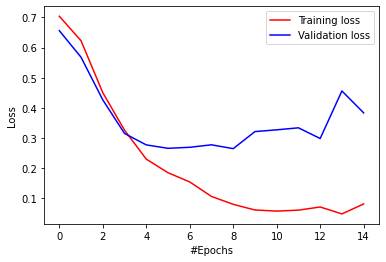

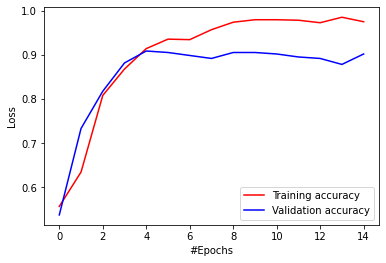

5/5 [==============================] - 2s 449ms/step - loss: 0.3403 - accuracy: 0.8864
[0.3403197228908539, 0.8863636255264282]


In [5]:


#Pintu, 181CO139
#29-03-2021
#Objective: Face mask detector using cnn.
#this is 2nd program.

import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

#load the saved data and split it.
data=np.load('/content/data.npy')
target=np.load('/content/target.npy')
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1) #other parameters can be passed.

#create the model
model=Sequential()
model.add(Conv2D(200, (3,3), input_shape=data.shape[1:], activation='relu'))
model.add(MaxPooling2D((2,2)))
#first cnn layer.
model.add(Conv2D(100, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
#second cnn layer.
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

#compiling the model.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#checkpoint
checkpoint=ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')

#train the model.
history=model.fit(x_train, y_train, epochs=15, callbacks=[checkpoint], validation_split=0.25)

#plot the training and validation loss.
plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.xlabel('#Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#plot the training and validation accuracy.
plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.xlabel('#Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#evaluate the model.
print(model.evaluate(x_test, y_test))


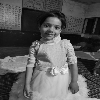

Result= Without_Mask


In [34]:


#Pintu, 181CO139
#29-03-2021
#Objective: Face mask detector using cnn.
#this is 3rd program.

from keras.models import load_model
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

#load the model.
model=load_model('/content/model-009.model')

#WE ARE GOING TO TEST ON TWO IMAGES.
#(1) read the image.
img=cv2.imread('/content/drive/MyDrive/Face_Mask_Detector_1/test_photo.jpg')
#convert rgb image into grayscale.
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#make it 100x100 pixel image.
resized=cv2.resize(img, (100,100))
#normalize the image.
normalized=resized/255.0
#reshape the image, to pass it to the model for testing.
reshaped=np.reshape(normalized, (1,100,100,1))
#prediction made by model.
result=model.predict(reshaped)
#find label with higher probability.
label=np.argmax(result, axis=1)[0]
#create the label_dictionary.
label_dict={0: 'With_Mask', 1:'Without_Mask'}

#display the image.
cv2_imshow(resized)
cv2.waitKey()
#print the result.
print("Result=",label_dict[label])


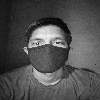

Result= With_Mask


In [36]:
#(2) read the image.
img=cv2.imread('/content/drive/MyDrive/Face_Mask_Detector_1/pintu_with_mask.jpg')
#convert rgb image into grayscale.
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#make it 100x100 pixel image.
resized=cv2.resize(img, (100,100))
#normalize the image.
normalized=resized/255.0
#reshape the image, to pass it to the model for testing.
reshaped=np.reshape(normalized, (1,100,100,1))
#prediction made by model.
result=model.predict(reshaped)
#find label with higher probability.
label=np.argmax(result, axis=1)[0]
#create the label_dictionary.
label_dict={0: 'With_Mask', 1:'Without_Mask'}

#display the image.
cv2_imshow(resized)
cv2.waitKey()
#print the result.
print("Result=",label_dict[label])